In [1]:
##########################################################
# Counting utility functions.                            #
# Don't worry about the implementation of anything here. #
##########################################################

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,5)
def count(f):
    """Return a counted version of f with a call_count attribute.

    >>> def fib(n):
    ...     if n == 0 or n == 1:
    ...         return n
    ...     else:
    ...         return fib(n-2) + fib(n-1)
    >>> fib = count(fib)
    >>> fib(20)
    6765
    >>> fib.call_count
    21891
    """
    def counted(n):
        counted.call_count += 1
        return f(n)
    counted.call_count = 0
    return counted

def call_on_values(f, seq):
    """
    Calls the one-argument function f on each value in lst,
    printing out how many calls are made for each input.
    """
    for n in seq:
        f.call_count = 0
        f(n)
        call_count = f.call_count
        print("Number of calls for n={0}: {1}".format(n, call_count))

def create_graph(f, seq, name, other_xs=None, other_ys = None, scale=1):
    """ Creates a plot of each value n in seq versus the number of calls in f(n).
    """
    counts = []
    for n in seq:
        f.call_count = 0
        f(n)
        call_count = f.call_count
        counts.append(call_count)
    plt.plot(seq, [c * scale for c in counts], 'bo')
    plt.ylabel('Number of calls')
    plt.xlabel('Input value')
    plt.title('Calls to ' + name)
    if other_xs and other_ys:
        plt.plot(other_xs, other_ys, '-r')
    plt.show()
        


In [2]:
###########################################
# Plotting time to run functions.         #
# Don't worry about any of the code here. #
###########################################
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('ggplot')

from timeit import repeat
from numpy import median, percentile

def plot_times(name, xs, order=None, n=7, pct=0.1):
    f = lambda x: name + '(' + str(x) + ')'
    g = globals()
    
    samples = []
    for _ in range(n):
        times = lambda x: repeat(f(x), globals=g, number=1, repeat=n)
        samples.append([median(times(x)) for x in xs])
    ys = [10e6 * median(sample) for sample in zip(*samples)]
    
    plots.figure(figsize=(8, 8))
    plt.ylabel('Median time to execute')
    plt.xlabel('Input value')
    plt.title('Time to run ' + name)
    plots.plot(xs, ys)
    
    if order:
        slopes = [y / order(x) for (x, y) in zip(xs, ys)]
        for slope in (percentile(slopes, pct), percentile(slopes, 100-pct)):
            plots.plot(xs, [slope * order(x) for x in xs], linewidth=3)

### Linear Growth

Number of calls for n=100: 100
Number of calls for n=200: 200
Number of calls for n=300: 300
Number of calls for n=500: 500
Number of calls for n=1000: 1000


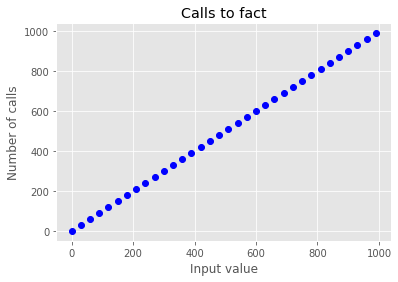

In [3]:
@count
def fact(n):
    if n <= 1:
        return 1
    else:
        return n * fact(n - 1)
    
call_on_values(fact, [100, 200, 300, 500, 1000])
create_graph(fact, range(0, 1000, 30), 'fact')

### Exponential Growth

Number of calls for n=10: 177
Number of calls for n=11: 287
Number of calls for n=12: 465
Number of calls for n=13: 753


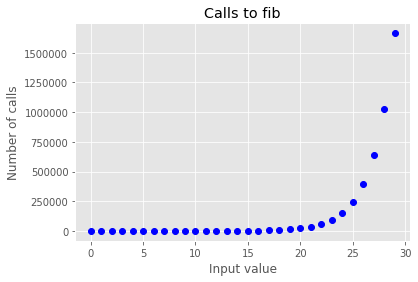

In [4]:
@count
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n - 2) * fib(n - 1)
    
call_on_values(fib, [10, 11, 12, 13])
create_graph(fib, range(0, 30), 'fib')

### Constant Growth

Number of calls for n=10: 1
Number of calls for n=20: 1
Number of calls for n=30: 1
Number of calls for n=500: 1


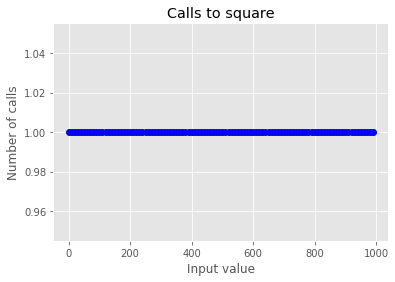

In [5]:
@count
def square(x):
    return x * x
    
call_on_values(square, [10, 20, 30, 500])
create_graph(square, range(0, 1000, 10), 'square')

### Logarithmic Growth

Number of calls for n=10: 2
Number of calls for n=15: 2
Number of calls for n=20: 2
Number of calls for n=25: 2
Number of calls for n=100: 3
Number of calls for n=200: 3
Number of calls for n=1000: 4


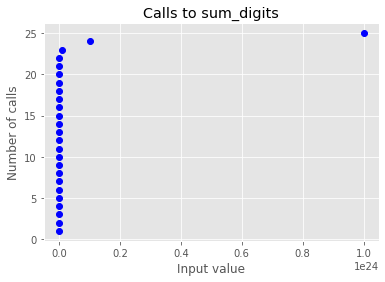

In [6]:
@count
def sum_digits(n):
    if n < 10:
        return n
    else:
        return n % 10 * sum_digits(n // 10)
    
call_on_values(sum_digits, [10, 15, 20, 25, 100, 200, 1000])
create_graph(sum_digits, [10 ** x for x in range(25)], 'sum_digits')

### Exponentiation

Number of calls for n=10: 11
Number of calls for n=15: 16
Number of calls for n=20: 21
Number of calls for n=25: 26
Number of calls for n=100: 101
Number of calls for n=200: 201
Number of calls for n=1000: 1001


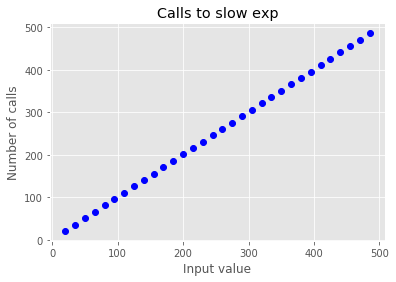

In [7]:
@count
def slow_exp(n):
    """Return 2 to the n.

    >>> slow_exp(10)
    1024
    """
    if n == 0:
        return 1
    else:
        return 2 * slow_exp(n-1)
    
call_on_values(slow_exp, [10, 15, 20, 25, 100, 200, 1000])
create_graph(slow_exp, range(20, 500, 15), 'slow exp')

Number of calls for n=10: 6
Number of calls for n=15: 8
Number of calls for n=20: 7
Number of calls for n=25: 8
Number of calls for n=100: 10
Number of calls for n=200: 11
Number of calls for n=1000: 16


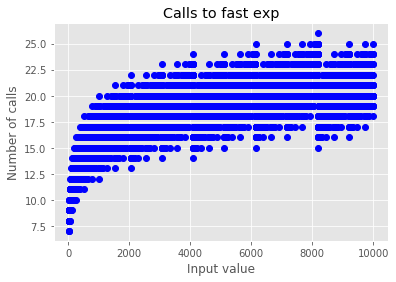

In [8]:
sq = lambda x: x * x

@count
def fast_exp(n):
    """Return 2 to the n.

    >>> fast_exp(10)
    1024
    """
    if n == 0:
        return 1
    elif n % 2 == 0:
        return sq(fast_exp(n // 2))
    else:
        return 2 * fast_exp(n - 1)
    
call_on_values(fast_exp, [10, 15, 20, 25, 100, 200, 1000])
create_graph(fast_exp, range(20, 10000), 'fast exp')

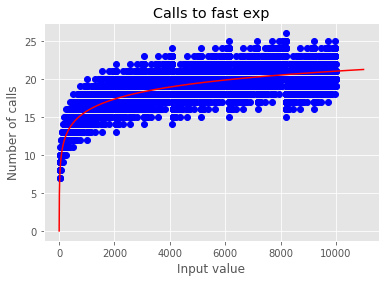

In [9]:
import math
create_graph(fast_exp, range(20, 10000), 'fast exp', range(1, 11000), [math.log(x, 1.55) for x in range(1, 11000)])

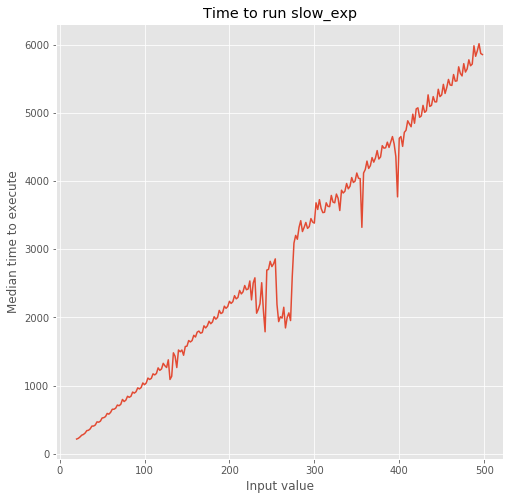

In [10]:
plot_times('slow_exp', range(20, 500, 2))

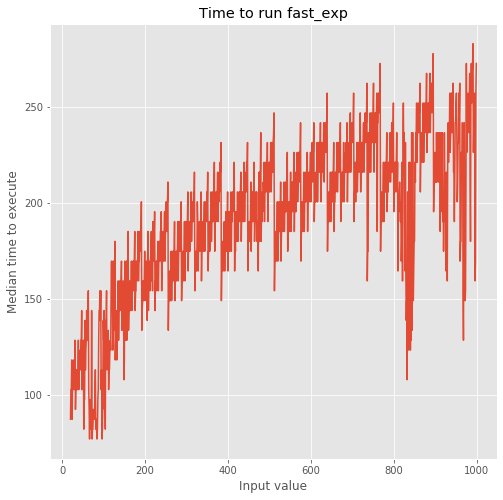

In [11]:
plot_times('fast_exp', range(20, 1000))